In [8]:
# 화면 가로 확장 코드 (기본 width 50%)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:60% !important; }</style>"))

### 자동 미분과 선형회귀 실습

In [2]:
import tensorflow as tf

w = tf.Variable(2.)

def f(w):
  y = w**2
  z = 2*y + 5
  return z

with tf.GradientTape() as tape:
    z = f(w)

gradients = tape.gradient(z, [w])
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


In [4]:
# 학습될 가중치 변수를 선언
w = tf.Variable(4.0)
b = tf.Variable(1.0)

@tf.function
def hypothesis(x):
  return w*x + b

x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[15. 21. 23. 25.]


In [6]:
@tf.function
def mse_loss(y_pred, y):
  # 두 개의 차이값을 제곱을 해서 평균을 취한다.
  return tf.reduce_mean(tf.square(y_pred - y))

x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

optimizer = tf.optimizers.SGD(0.01)

for i in range(301):
  with tf.GradientTape() as tape:
    # 현재 파라미터에 기반한 입력 x에 대한 예측값을 y_pred
    y_pred = hypothesis(x)

    # 평균 제곱 오차를 계산
    cost = mse_loss(y_pred, y)

  # 손실 함수에 대한 파라미터의 미분값 계산
  gradients = tape.gradient(cost, [w, b])

  # 파라미터 업데이트
  optimizer.apply_gradients(zip(gradients, [w, b]))

  if i % 10 == 0:
    print("epoch : {:3} | w의 값 : {:5.4f} | b의 값 : {:5.4} | cost : {:5.6f}".format(i, w.numpy(), b.numpy(), cost))

epoch :   0 | w의 값 : 8.2133 | b의 값 : 1.664 | cost : 1402.555542
epoch :  10 | w의 값 : 10.4971 | b의 값 : 1.977 | cost : 1.351182
epoch :  20 | w의 값 : 10.5047 | b의 값 :  1.93 | cost : 1.328163
epoch :  30 | w의 값 : 10.5119 | b의 값 : 1.884 | cost : 1.306966
epoch :  40 | w의 값 : 10.5188 | b의 값 : 1.841 | cost : 1.287436
epoch :  50 | w의 값 : 10.5254 | b의 값 : 1.799 | cost : 1.269459
epoch :  60 | w의 값 : 10.5318 | b의 값 : 1.759 | cost : 1.252897
epoch :  70 | w의 값 : 10.5379 | b의 값 : 1.721 | cost : 1.237644
epoch :  80 | w의 값 : 10.5438 | b의 값 : 1.684 | cost : 1.223597
epoch :  90 | w의 값 : 10.5494 | b의 값 : 1.648 | cost : 1.210658
epoch : 100 | w의 값 : 10.5548 | b의 값 : 1.614 | cost : 1.198740
epoch : 110 | w의 값 : 10.5600 | b의 값 : 1.582 | cost : 1.187767
epoch : 120 | w의 값 : 10.5650 | b의 값 :  1.55 | cost : 1.177665
epoch : 130 | w의 값 : 10.5697 | b의 값 :  1.52 | cost : 1.168354
epoch : 140 | w의 값 : 10.5743 | b의 값 : 1.492 | cost : 1.159782
epoch : 150 | w의 값 : 10.5787 | b의 값 : 1.464 | cost : 1.151890
epoch 

### 케라스 선형 회귀

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 2877.3699 - mse: 2877.3699

C:\Users\82108\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 146ms/step - loss: 2877.3699 - mse: 2877.3699
Epoch 2/300
1/1 [==============================] - 0s 4ms/step - loss: 355.0509 - mse: 355.0509
Epoch 3/300
1/1 [==============================] - 0s 4ms/step - loss: 44.6977 - mse: 44.6977
Epoch 4/300
1/1 [==============================] - 0s 4ms/step - loss: 6.5104 - mse: 6.5104
Epoch 5/300
1/1 [==============================] - 0s 4ms/step - loss: 1.8111 - mse: 1.8111
Epoch 6/300
1/1 [==============================] - 0s 4ms/step - loss: 1.2322 - mse: 1.2322
Epoch 7/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1603 - mse: 1.1603
Epoch 8/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1508 - mse: 1.1508
Epoch 9/300
1/1 [==============================] - 0s 5ms/step - loss: 1.1490 - mse: 1.1490
Epoch 10/300
1/1 [==============================] - 0s 3ms/step - loss: 1.1482 - mse: 1.1482
Epoch 11/300
1/1 [==============================] - 0s 4ms/step - loss: 1.147

1/1 [==============================] - 0s 5ms/step - loss: 1.1059 - mse: 1.1059
Epoch 90/300
1/1 [==============================] - 0s 5ms/step - loss: 1.1056 - mse: 1.1056
Epoch 91/300
1/1 [==============================] - 0s 5ms/step - loss: 1.1052 - mse: 1.1052
Epoch 92/300
1/1 [==============================] - 0s 5ms/step - loss: 1.1048 - mse: 1.1048
Epoch 93/300
1/1 [==============================] - 0s 5ms/step - loss: 1.1044 - mse: 1.1044
Epoch 94/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1041 - mse: 1.1041
Epoch 95/300
1/1 [==============================] - 0s 5ms/step - loss: 1.1037 - mse: 1.1037
Epoch 96/300
1/1 [==============================] - 0s 5ms/step - loss: 1.1034 - mse: 1.1034
Epoch 97/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1030 - mse: 1.1030
Epoch 98/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1026 - mse: 1.1026
Epoch 99/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1023 - ms

1/1 [==============================] - 0s 5ms/step - loss: 1.0824 - mse: 1.0824
Epoch 177/300
1/1 [==============================] - 0s 5ms/step - loss: 1.0822 - mse: 1.0822
Epoch 178/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0820 - mse: 1.0820
Epoch 179/300
1/1 [==============================] - 0s 5ms/step - loss: 1.0818 - mse: 1.0818
Epoch 180/300
1/1 [==============================] - 0s 5ms/step - loss: 1.0817 - mse: 1.0817
Epoch 181/300
1/1 [==============================] - 0s 5ms/step - loss: 1.0815 - mse: 1.0815
Epoch 182/300
1/1 [==============================] - 0s 5ms/step - loss: 1.0813 - mse: 1.0813
Epoch 183/300
1/1 [==============================] - 0s 5ms/step - loss: 1.0811 - mse: 1.0811
Epoch 184/300
1/1 [==============================] - 0s 5ms/step - loss: 1.0809 - mse: 1.0809
Epoch 185/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0808 - mse: 1.0808
Epoch 186/300
1/1 [==============================] - 0s 4ms/step - loss: 1

1/1 [==============================] - 0s 4ms/step - loss: 1.0709 - mse: 1.0709
Epoch 264/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0708 - mse: 1.0708
Epoch 265/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0707 - mse: 1.0707
Epoch 266/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0706 - mse: 1.0706
Epoch 267/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0705 - mse: 1.0705
Epoch 268/300
1/1 [==============================] - 0s 5ms/step - loss: 1.0704 - mse: 1.0704
Epoch 269/300
1/1 [==============================] - 0s 5ms/step - loss: 1.0703 - mse: 1.0703
Epoch 270/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0703 - mse: 1.0703
Epoch 271/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0702 - mse: 1.0702
Epoch 272/300
1/1 [==============================] - 0s 5ms/step - loss: 1.0701 - mse: 1.0701
Epoch 273/300
1/1 [==============================] - 0s 4ms/step - loss: 1

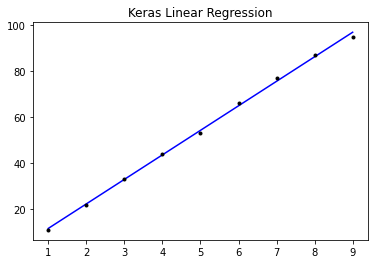

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

model = Sequential()

# 출력 y의 차원은 1. 입력 x의 차원(input_dim)은 1
# 선형 회귀이므로 activation은 'linear'
model.add(Dense(1, input_dim=1, activation='linear'))

# sgd는 경사 하강법을 의미. 학습률(learning rate, lr)은 0.01.
sgd = optimizers.SGD(lr=0.01)

# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

# 주어진 x와 y데이터에 대해서 오차를 최소화하는 작업을 300번 시도합니다.
model.fit(x, y, epochs=300)

plt.plot(x, model.predict(x), 'b', x, y, 'k.')
plt.title('Keras Linear Regression')
plt.savefig('./Keras_Linear_Graph.png')
print(model.predict([9.5]))

### 시그모이드 함수

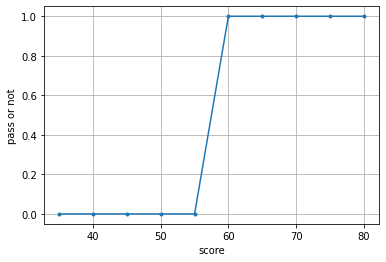

In [23]:
plt.plot([35,40,45,50,55,60,65,70,75,80],[0,0,0,0,0,1,1,1,1,1],'.-')
plt.grid(True)
plt.xlabel('score')
plt.ylabel('pass or not')
plt.savefig('./S_Graph.png')
plt.show()

In [11]:
import numpy as np
import matplotlib.pyplot as plt

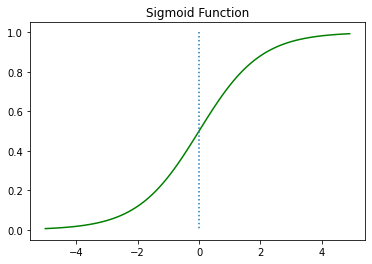

In [30]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.savefig('./Sigmoid.png')
plt.show()

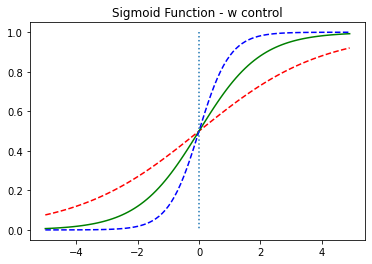

In [29]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--') # w의 값이 0.5일때
plt.plot(x, y2, 'g') # w의 값이 1일때
plt.plot(x, y3, 'b', linestyle='--') # w의 값이 2일때
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function - w control')
plt.savefig('./Sigmoid_w.png')
plt.show()

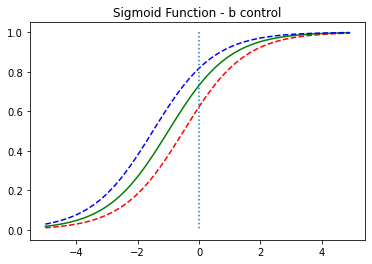

In [28]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--') # x + 0.5
plt.plot(x, y2, 'g') # x + 1
plt.plot(x, y3, 'b', linestyle='--') # x + 1.5
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function - b control')
plt.savefig('./Sigmoid_b.png')
plt.show()